In [1]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
import pandas as pd

In [2]:
m5long_step_4 = pd.read_csv("final_complete_m5long_timestep_4.csv")

In [4]:
a1 = list(m5long_step_4.loc[:100]["MA 18"])
a1 = np.array(a1)
# a1 / (np.max(a1) - np.min(a1))
a1/np.max(a1)

array([0.99990315, 0.99988647, 0.99988473, 0.99987063, 0.99986044,
       0.99989704, 0.99994875, 0.99994731, 0.99995094, 1.        ,
       0.99995313, 0.9993544 , 0.99934512, 0.99934557, 0.99933961,
       0.99935349, 0.99935464, 0.99934716, 0.99934867, 0.99936852,
       0.99934383, 0.99931553, 0.99929583, 0.9992935 , 0.999299  ,
       0.99935502, 0.99933485, 0.99934942, 0.99937833, 0.99937493,
       0.99937245, 0.99938166, 0.99941531, 0.99942385, 0.99941607,
       0.9994348 , 0.99944537, 0.99940603, 0.99945518, 0.99944234,
       0.99941743, 0.99938716, 0.99937425, 0.99935961, 0.99937472,
       0.99942641, 0.99941359, 0.99936459, 0.99903505, 0.99906991,
       0.99908917, 0.99910751, 0.99916789, 0.99914502, 0.99911468,
       0.99911679, 0.99911974, 0.99917544, 0.99919514, 0.99921892,
       0.99923393, 0.99918434, 0.99916109, 0.99913959, 0.99913868,
       0.99912623, 0.99912509, 0.99912396, 0.99910842, 0.99907543,
       0.99911422, 0.99913114, 0.99912827, 0.99909807, 0.99912

In [5]:
print(np.max(a1), np.min(a1))

7360.1828 7351.5444


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ltc_4 (LTC)                 (None, None, 1)           350       
                                                                 
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 3.0085
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 2.8227
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 2.0238
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.6530
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 1.3935
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.1847
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 1.0092
Epoch 8/50
1/1 [==============================] - 1s

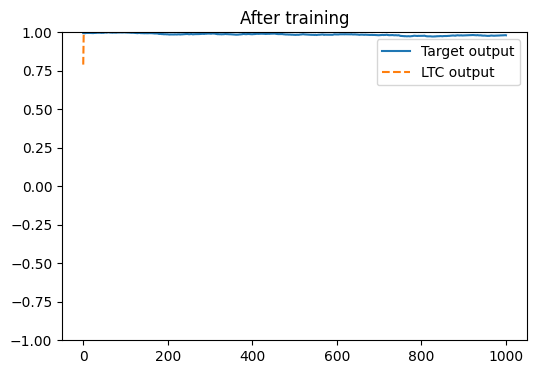

In [74]:
import matplotlib.pyplot as plt
a1 = np.array(list(m5long_step_4.loc[:1000]["MA 18"]))
a2 = np.array(list(m5long_step_4.loc[:1000]["MA 50"]))
a = np.expand_dims(np.stack([a1/np.max(a1), a2/np.max(a2)], axis=1), axis = 0)
b = np.array(list(m5long_step_4.loc[:1000]["Ask"]))
b = b/np.max(b)
b=b.reshape(1,len(b), 1)
wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 2)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()
hist = model.fit(x=a, y=b, batch_size=1, epochs=50,verbose=1)
# How does the trained model now fit to the sinusoidal function?
prediction = model(a).numpy()
plt.figure(figsize=(6, 4))
plt.plot(b[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

In [ ]:
a

In [ ]:

import matplotlib.pyplot as plt
a1 = np.array(list(m5long_step_4.loc[:100]["MA 18"]))
a2 = np.array(list(m5long_step_4.loc[:100]["MA 50"]))
a = np.expand_dims( np.stack([1 - ( (np.max(a1) - a1)/np.max(a1) ) , 1 - (np.max(a2) - a2)/np.max(a2)], axis=1), axis = 0)
b = np.array(list(m5long_step_4.loc[:100]["Ask"]))
b = 1 - (np.max(b) - b)/np.max(b)
b=b.reshape(1,len(b), 1)
hist = model.fit(x=a, y=b, batch_size=1, epochs=50,verbose=1)

prediction = model(a).numpy()
plt.figure(figsize=(6, 4))
plt.plot(b[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
# plt.ylim((-1, 1))|
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

In [62]:
1-((80-5)/80)

0.0625

In [40]:
import matplotlib.pyplot as plt
# import seaborn as sns

N = 48 # Length of the time-series
# Input feature is a sine and a cosine wave
data_x = np.stack(
    [np.sin(np.linspace(0, 3 * np.pi, N)), np.cos(np.linspace(0, 3 * np.pi, N))], axis=1
)
data_x = np.expand_dims(data_x, axis=0).astype(np.float32)  # Add batch dimension
# Target output is a sine with double the frequency of the input signal
data_y = np.sin(np.linspace(0, 6 * np.pi, N)).reshape([1, N, 1]).astype(np.float32)
print("data_x.shape: ", str(data_x.shape))
print("data_y.shape: ", str(data_y.shape))

# Let's visualize the training data
# sns.set()
# plt.figure(figsize=(6, 4))
# plt.plot(data_x[0, :, 0], label="Input feature 1")
# plt.plot(data_x[0, :, 1], label="Input feature 1")
# plt.plot(data_y[0, :, 0], label="Target output")
# plt.ylim((-1, 1))
# plt.title("Training data")
# plt.legend(loc="upper right")
# plt.show()

data_x.shape:  (1, 48, 2)
data_y.shape:  (1, 48, 1)


In [8]:
N = 48
np.sin(np.linspace(0, 3 * np.pi, N)).shape

(48,)

In [ ]:
data_x

In [38]:
data_y.shape

(1, 48, 1)

In [7]:
wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 2)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ltc_1 (LTC)                 (None, None, 1)           350       
                                                                 
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# sns.set_style("white")
# plt.figure(figsize=(6, 4))
# legend_handles = wiring.draw_graph(draw_labels=True, neuron_colors={"command": "tab:cyan"})
# plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
# sns.despine(left=True, bottom=True)
# plt.tight_layout()
# plt.show()

In [ ]:
# Let's visualize how LTC initialy performs before the training
# sns.set()
# prediction = model(data_x).numpy()
# plt.figure(figsize=(6, 4))
# plt.plot(data_y[0, :, 0], label="Target output")
# plt.plot(prediction[0, :, 0], label="NCP output")
# plt.ylim((-1, 1))
# plt.title("Before training")
# plt.legend(loc="upper right")
# plt.show()

In [ ]:
# Train the model for 400 epochs (= training steps)
hist = model.fit(x=data_x, y=data_y, batch_size=1, epochs=100,verbose=1)

In [ ]:
# Let's visualize the training loss
sns.set()
plt.figure(figsize=(6, 4))
plt.plot(hist.history["loss"], label="Training loss")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.show()

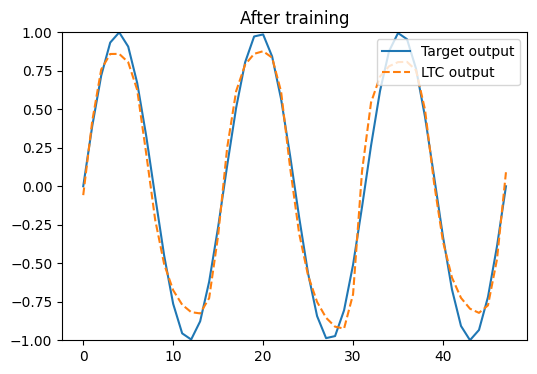

In [9]:
# How does the trained model now fit to the sinusoidal function?
prediction = model(data_x).numpy()
plt.figure(figsize=(6, 4))
plt.plot(data_y[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.title("After training")
plt.show()